# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [3]:
import sweep
sweep.set_basedir("data")

In [ ]:
from qcodes.instrument_drivers.Keithley import Keithley2400
from qcodes.instrument_drivers.Keysight.Keysight_34461A_submodules import Keysight_34461A

In [4]:
import pyvisa as visa
rm = visa.ResourceManager()
rm.list_resources()

('ASRL1::INSTR',
 'ASRL3::INSTR',
 'ASRL4::INSTR',
 'ASRL5::INSTR',
 'ASRL6::INSTR',
 'ASRL7::INSTR',
 'GPIB0::2::INSTR',
 'GPIB0::24::INSTR')

# Setting up instruments

In [6]:
ksrc = Keithley2400("ksrc", 'GPIB0::24::INSTR')

Connected to: KEITHLEY INSTRUMENTS INC. 2401 (serial:4585865, firmware:B02 Jan 20 2021 10:19:49/B01  /W/N) in 0.02s


In [7]:
agi1 = Keysight_34461A('agi1', 'TCPIP::192.168.0.101::inst0::INSTR'); # bottom

Connected to: Keysight Technologies 34461A (serial:MY60057441, firmware:A.03.03-03.15-03.03-00.52-04-03) in 0.45s


# Nb Doped STO

## Using a for loop for sweeping

In [14]:
ksrc_volts = []
agi1_volts = []
for i in range(10):
    ksrc_volts.append(ksrc.volt.get())
    agi1_volts.append(agi1.volt.get())

## Using sweep for sweeping

Starting run with ID 4
Minimum duration 0h 0m 10s


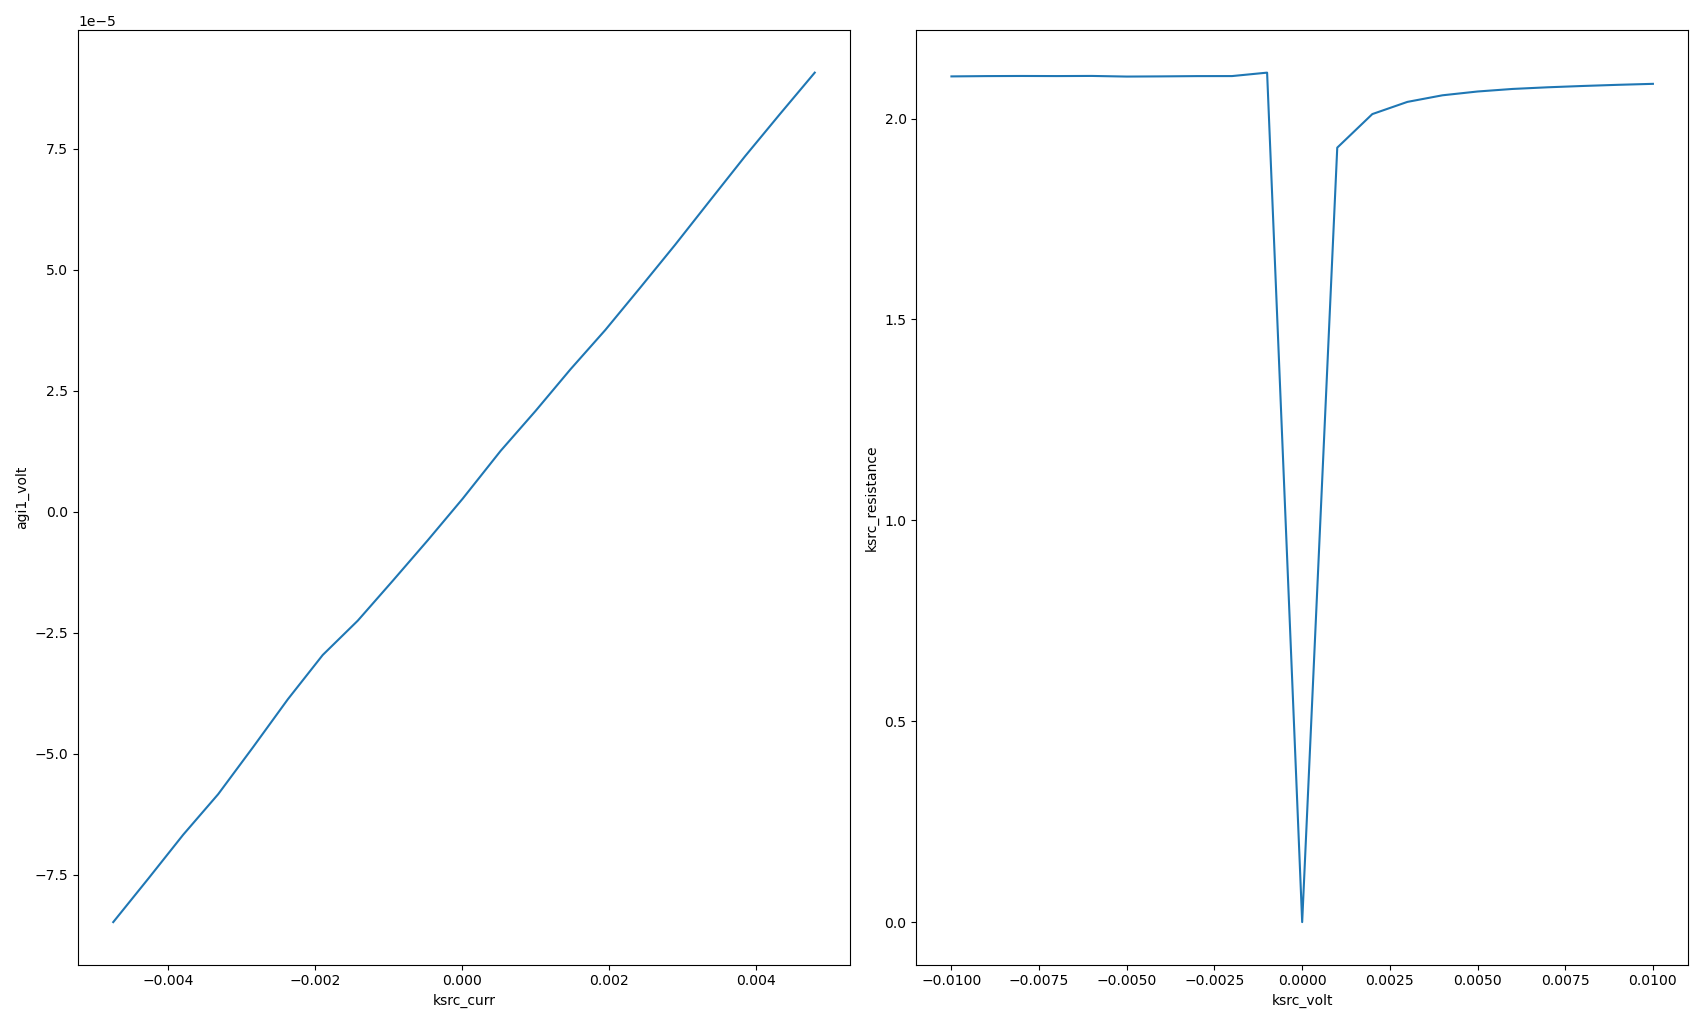

Completed in 0h 0m 21s
Data saved in data\4\data.tsv.gz


In [26]:
s = sweep.Station()

s.follow_param(ksrc.curr)
s.follow_param(agi1.volt)

s.follow_param(ksrc.volt)
s.follow_param(ksrc.resistance)

s.plot(ksrc.curr, agi1.volt)
s.plot(ksrc.volt, ksrc.resistance)

result = s.sweep(ksrc.volt, np.linspace(-1e-2, 1e-2, 21), delay=0.5)

## Calculating rough resistivity estimate

### 4 probe measurement

In [9]:
ksrc.volt.set(10e-3)

In [18]:
agi1.volt.get() / ksrc.curr.get() * np.pi / np.log(2) * 0.5e-3 * 100

0.004171543104759193

### 2 probe measurement

In [23]:
ksrc.volt.get() / ksrc.curr.get() * np.pi / np.log(2) * 0.5e-3 * 100

0.42104579966122013

### You can see that the 4 probe one falls in line with manufacturer's specifications

In [24]:
# https://www.mtixtl.com/STO-Nb-a-050505S2.aspx
# The above link has the resistivity for Nb doped STO

# STO/Nb "D"

## Original orientation

Starting run with ID 6
Minimum duration 0h 0m 10s


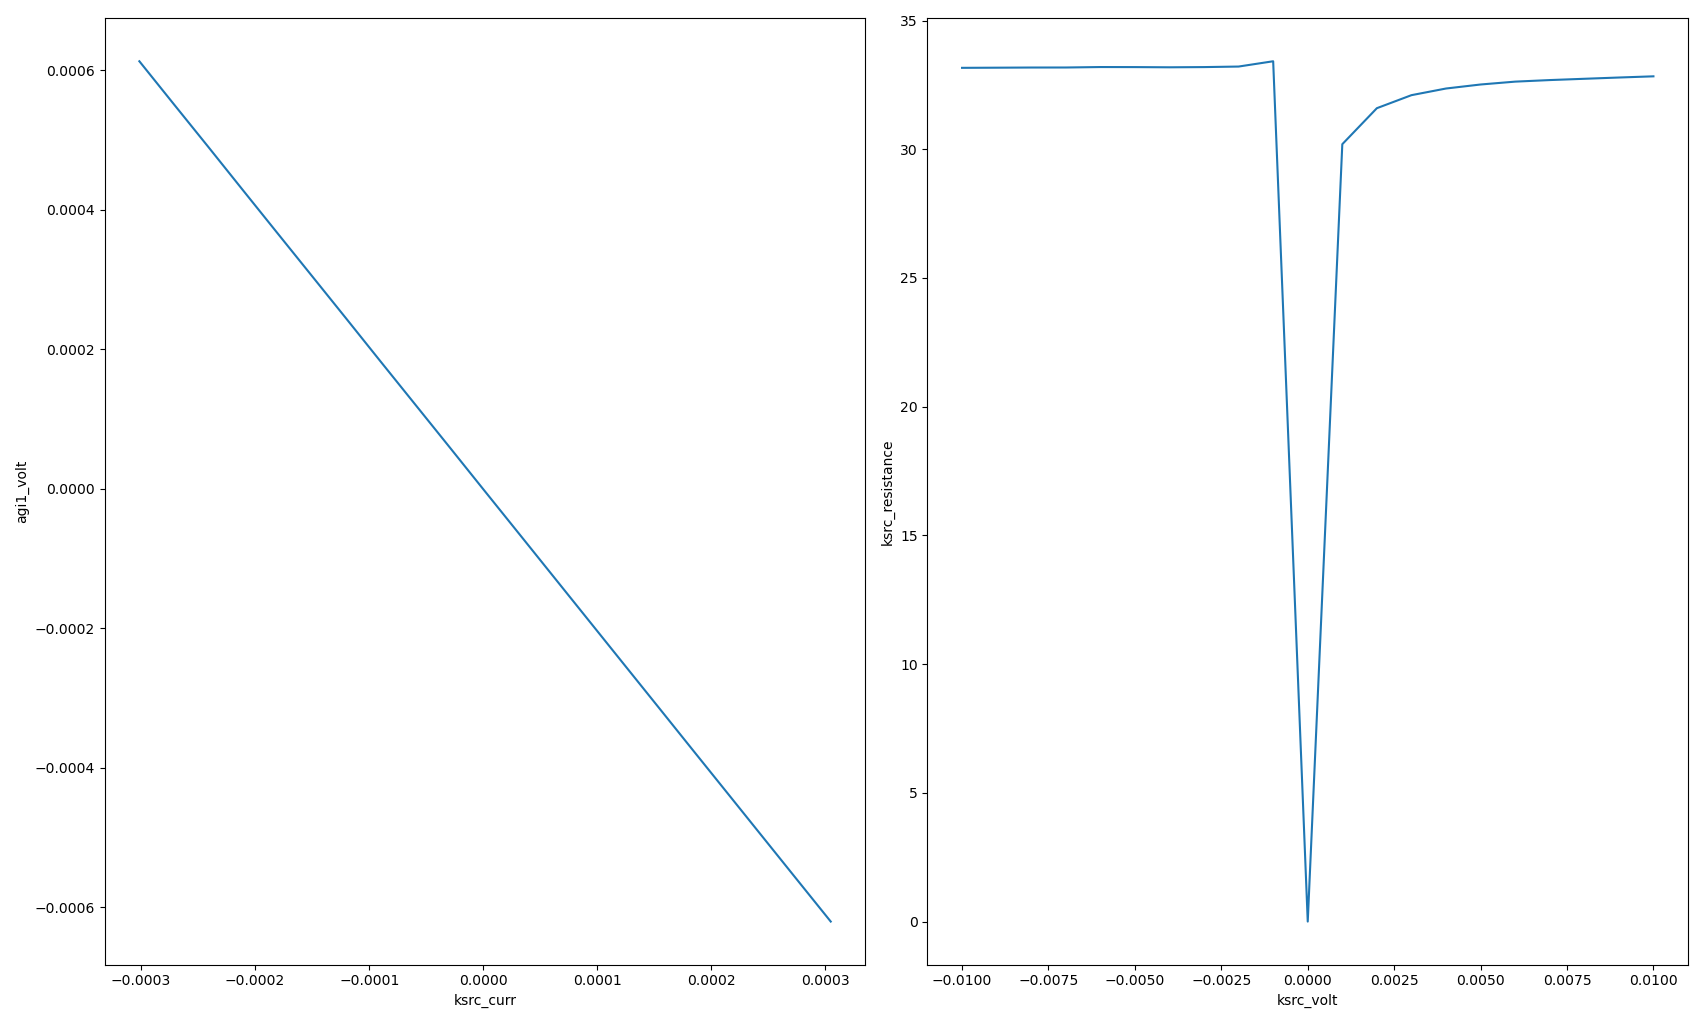

Completed in 0h 0m 21s
Data saved in data\6\data.tsv.gz


In [26]:
s = sweep.Station()

s.follow_param(ksrc.curr)
s.follow_param(agi1.volt)

s.follow_param(ksrc.volt)
s.follow_param(ksrc.resistance)

s.plot(ksrc.curr, agi1.volt)
s.plot(ksrc.volt, ksrc.resistance)

result = s.sweep(ksrc.volt, np.linspace(-1e-2, 1e-2, 21), delay=0.5)

Starting run with ID 7
Minimum duration 0h 0m 50s


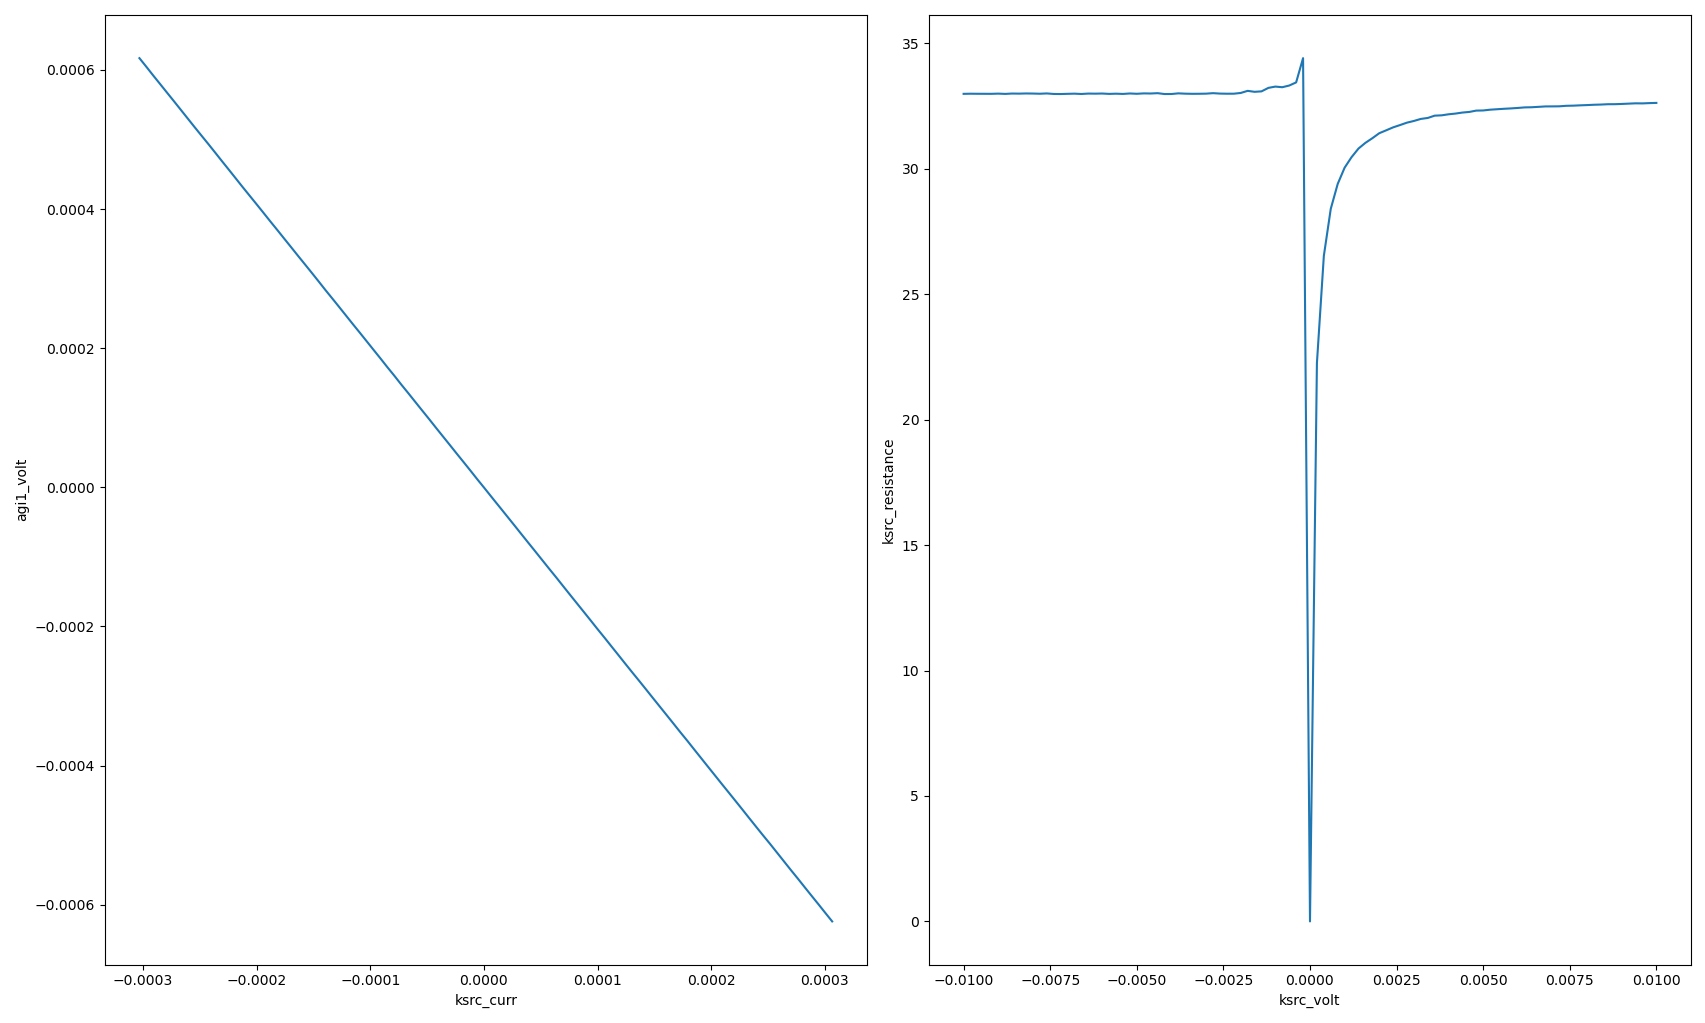

Completed in 0h 1m 44s
Data saved in data\7\data.tsv.gz


In [29]:
s = sweep.Station()

s.follow_param(ksrc.curr)
s.follow_param(agi1.volt)

s.follow_param(ksrc.volt)
s.follow_param(ksrc.resistance)

s.plot(ksrc.curr, agi1.volt)
s.plot(ksrc.volt, ksrc.resistance)

result = s.sweep(ksrc.volt, np.linspace(-1e-2, 1e-2, 101), delay=0.5)

## After rotation

Starting run with ID 8
Minimum duration 0h 0m 50s


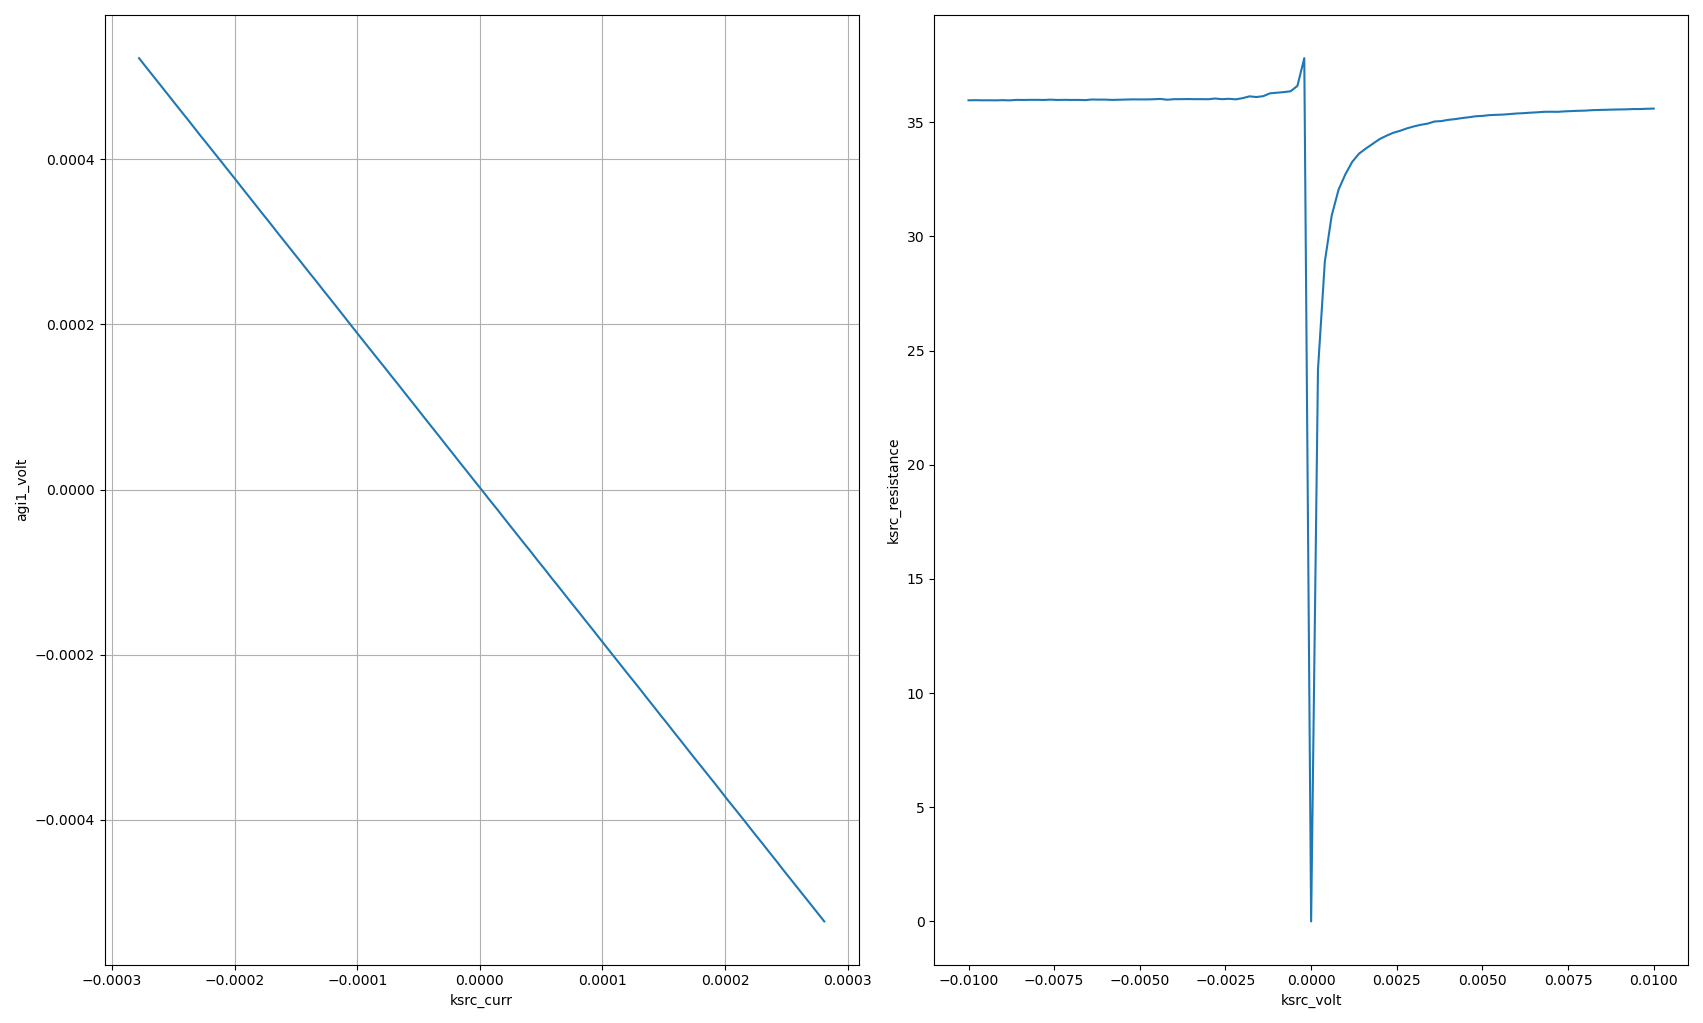

Completed in 0h 1m 44s
Data saved in data\8\data.tsv.gz


In [30]:
s = sweep.Station()

s.follow_param(ksrc.curr)
s.follow_param(agi1.volt)

s.follow_param(ksrc.volt)
s.follow_param(ksrc.resistance)

s.plot(ksrc.curr, agi1.volt)
s.plot(ksrc.volt, ksrc.resistance)

result = s.sweep(ksrc.volt, np.linspace(-1e-2, 1e-2, 101), delay=0.5)

# Sapphire/Nb "B" Hall Bar

Starting run with ID 9
Minimum duration 0h 0m 50s


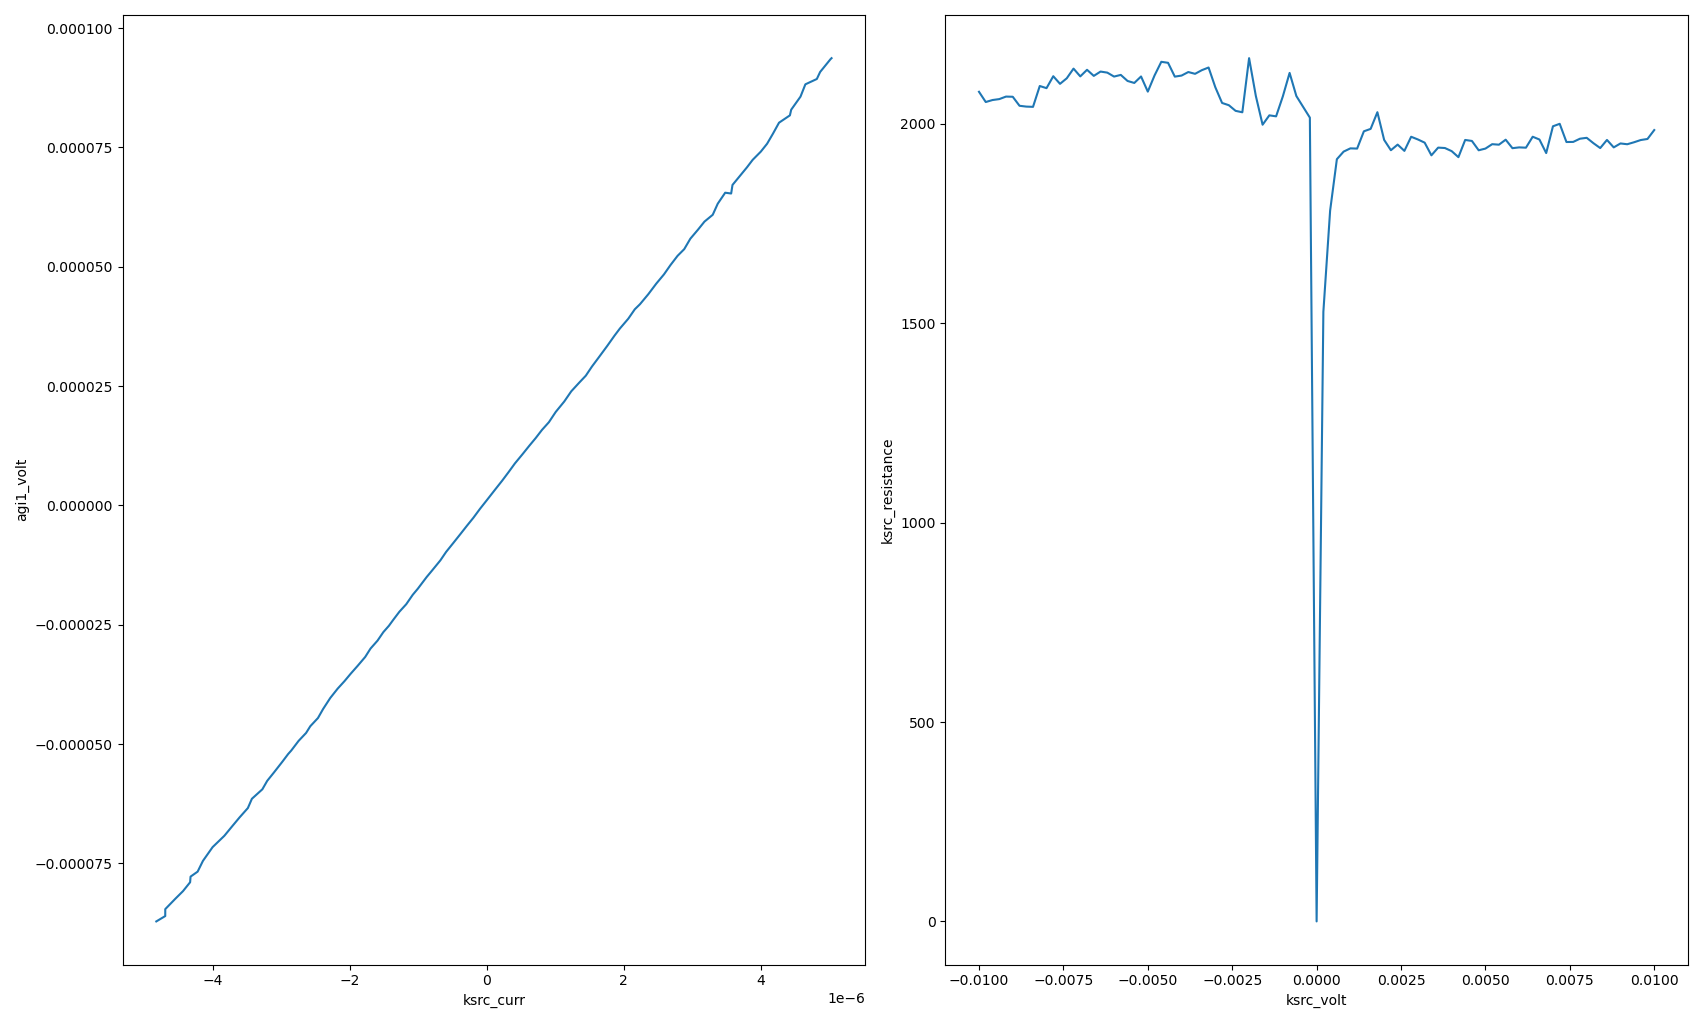

Completed in 0h 1m 45s
Data saved in data\9\data.tsv.gz


In [31]:
s = sweep.Station()

s.follow_param(ksrc.curr)
s.follow_param(agi1.volt)

s.follow_param(ksrc.volt)
s.follow_param(ksrc.resistance)

s.plot(ksrc.curr, agi1.volt)
s.plot(ksrc.volt, ksrc.resistance)

result = s.sweep(ksrc.volt, np.linspace(-1e-2, 1e-2, 101), delay=0.5)